# Deep Learning case Study: Retinal OCT Images classification.

Data Source: https://www.kaggle.com/paultimothymooney/kermany2018

## Objective:
Given a new OCT image, determine whether the image belongs to which 4 class: CNV, DME, DRUSEN, and NORMAL.
We are using CNN for the classification model.

## ![title](retina.png) 

Figure: Representative Optical Coherence Tomography Images and the Workflow Diagram
2. Reference: [Kermany et. al. 2018] http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

1. (Far left) choroidal neovascularization (CNV) with neovascular membrane (white arrowheads) and associated subretinal      fluid (arrows). 
2. (Middle left) Diabetic macular edema (DME) with retinal-thickening-associated intraretinal fluid (arrows). 
3. (Middle right) Multiple drusen (arrowheads) present in early AMD. 
4. (Far right) Normal retina with preserved foveal contour and absence of any retinal fluid/edema.

## Context

http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Retinal optical coherence tomography (OCT) is an imaging technique used to capture high-resolution cross sections of the retinas of living patients. Total **83,484** OCT images are there in the training dataset. Also **1000** OCT images are there in the test dataset.

It is an **imbalanced** dataset.
Training dataset contains below number of images:

1. CNV = 26315
2. DME = 37205
3. DRUSEN = 11348
4. NORMAL = 8616

## Content:

The dataset is organized into 2 folders (train, test) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN). There are **84,495 X-Ray images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN).**

Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.

Optical coherence tomography (OCT) images (Spectralis OCT, Heidelberg Engineering, Germany) were selected from retrospective cohorts of adult patients from the Shiley Eye Institute of the University of California San Diego, the California Retinal Research Foundation, Medical Center Ophthalmology Associates, the Shanghai First People’s Hospital, and Beijing Tongren Eye Center between July 1, 2013 and March 1, 2017.

Before training, each image went through a tiered grading system consisting of multiple layers of trained graders of increasing exper- tise for verification and correction of image labels. Each image imported into the database started with a label matching the most recent diagnosis of the patient. The first tier of graders consisted of undergraduate and medical students who had taken and passed an OCT interpretation course review. This first tier of graders conducted initial quality control and excluded OCT images containing severe artifacts or significant image resolution reductions. The second tier of graders consisted of four ophthalmologists who independently graded each image that had passed the first tier. The presence or absence of choroidal neovascularization (active or in the form of subretinal fibrosis), macular edema, drusen, and other pathologies visible on the OCT scan were recorded. Finally, a third tier of two senior independent retinal specialists, each with over 20 years of clinical retina experience, verified the true labels for each image. To account for human error in grading, a validation subset of 993 scans was graded separately by two ophthalmologist graders, with disagreement in clinical labels arbitrated by a senior retinal specialist.

### Acknowledgements
1. Data: https://data.mendeley.com/datasets/rscbjbr9sj/2
2. Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Dataset of validated OCT and Chest X-Ray images described and analyzed in "Deep learning-based classification and referral of treatable human diseases". The OCT Images are split into a training set and a testing set of independent patients. OCT Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.


# Overview of CNN Architecture:

1. Keras allows us to specify the number of filters we want and the size of the filters. So, in our **first layer** we specify the **shape of the input & Number of filters**.

3. The **second layer** is the Activation layer. We have used **ReLU (rectified linear unit) as our activation function. ReLU function    is f(x) = max(0, x), where x is the input.** It sets all negative values in the matrix ‘x’ to 0 and keeps all the other values    constant. It is the most used activation function since it reduces training time and prevents the problem of vanishing gradients.

4. The **third layer is the MaxPooling layer.** MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting. It also reduces the number of parameters to learn, reducing the training time.

4. We can repeat the Activation layers if we want to create a Deep CNN.

5. It’s a best practice to always do **BatchNormalization.** BatchNormalization normalizes the matrix after it is been through a convolution layer so that the scale of each dimension remains the same. It reduces the training time significantly.

6. **Dropout is the method used to reduce overfitting.** It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.

7. After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers. Dense layers are keras’s alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.

8. The **last layer is the Softmax Activation layer.** Softmax activation enables us to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

In [1]:
# Importing all the needed modules.
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

Using TensorFlow backend.


## Baseline Model: CNN with 3 Hidden Layers.

**Due to large size of dataset we have used ImageDataGenerator module from keras for Batch wise training of our CNN model.**

In [2]:
# Model parameters
image_size = 256
batch_size = 32
num_classes = 4
epochs = 10

In [3]:
# Baseline Model.
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 256)     7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 256)     1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 256)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 128)     295040    
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 128)     512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 128)       0         
__________

In [4]:
filepath="weights_baseline.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [5]:
train_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory('OCT2017/train',target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory('OCT2017/train',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data


test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory("OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [6]:
# Train the network
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              epochs = epochs, 
                              callbacks=callbacks_list)

Epoch 1/10
2087/2087 [==============================] - 2770s 1s/step - loss: 0.6977 - acc: 0.7462 - val_loss: 0.7722 - val_acc: 0.7156

Epoch 00001: val_acc improved from -inf to 0.71557, saving model to weights_baseline.best.hdf5
Epoch 2/10
2087/2087 [==============================] - 655s 314ms/step - loss: 0.3858 - acc: 0.8623 - val_loss: 0.4815 - val_acc: 0.8262

Epoch 00002: val_acc improved from 0.71557 to 0.82615, saving model to weights_baseline.best.hdf5
Epoch 3/10
2087/2087 [==============================] - 654s 313ms/step - loss: 0.2716 - acc: 0.9067 - val_loss: 1.1615 - val_acc: 0.7699

Epoch 00003: val_acc did not improve from 0.82615
Epoch 4/10
2087/2087 [==============================] - 655s 314ms/step - loss: 0.2056 - acc: 0.9298 - val_loss: 0.3488 - val_acc: 0.8749

Epoch 00004: val_acc improved from 0.82615 to 0.87494, saving model to weights_baseline.best.hdf5
Epoch 5/10
2087/2087 [==============================] - 658s 315ms/step - loss: 0.1618 - acc: 0.9439 - va

In [7]:
# serialize model to JSON
model_json = model.to_json()
with open("model_baseline.json", "w") as json_file:
    json_file.write(model_json)




Test Loss: 0.6890423384087145
Test accuracy: 0.8543388429752066


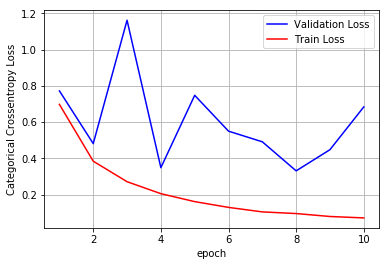

In [12]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // batch_size) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# This function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [3]:
def load_test_data(folder):
    """
    Function to load the images and labels.
    """
    Image = []
    Label = []
    
    for folder_name in os.listdir(folder):
        # Reading the labels.
        if not folder_name.startswith('.'):
            if folder_name in ['CNV']:
                label = 0
            elif folder_name in ['DME']:
                label = 1
            elif folder_name in ['DRUSEN']:
                label = 2
            elif folder_name in ['NORMAL']:
                label = 3
            else:
                label = 4
            for image_file_name in tqdm(os.listdir(folder + folder_name)):
                # Reading the images.
                image_file = cv2.imread(folder + folder_name + '/' + image_file_name)
                if image_file is not None:
                    # Converting images into array.
                    image_file = skimage.transform.resize(image_file, (image_size, image_size, 3))
                    image_array = np.asarray(image_file)
                    Image.append(image_array)
                    Label.append(label)
    Image = np.asarray(Image)
    Label = np.asarray(Label)
    return Image,Label
#Reference: https://stackoverflow.com/questions/49220111/read-own-multiple-images-from-folder-and-save-as-a-dataset-for-training
#Reference: https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder

In [4]:
# Load the Test labels.
X_test,Y_test= load_test_data("OCT2017/test/")

100%|██████████| 250/250 [00:03<00:00, 65.00it/s]


In [5]:
from keras.models import load_model
model = load_model('weights_baseline.best.hdf5')

In [6]:
pred_datagen = ImageDataGenerator()

pred_generator = pred_datagen.flow_from_directory("OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)                                                  

Found 1000 images belonging to 4 classes.


In [7]:
pred_generator.reset()
y_pred = model.predict_generator(pred_generator,steps = 1000)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

In [8]:
Y_pred = np.argmax(y_pred,axis = 1) 

In [9]:
import pickle
with open('y_pred_baseline_model.pkl','wb') as f:
    pickle.dump(y_pred, f)

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

--------------------
| Confusion Matrix |
--------------------

 [[250   0   0   0]
 [ 48 195   0   7]
 [ 16   0 233   1]
 [  0   0   2 248]]


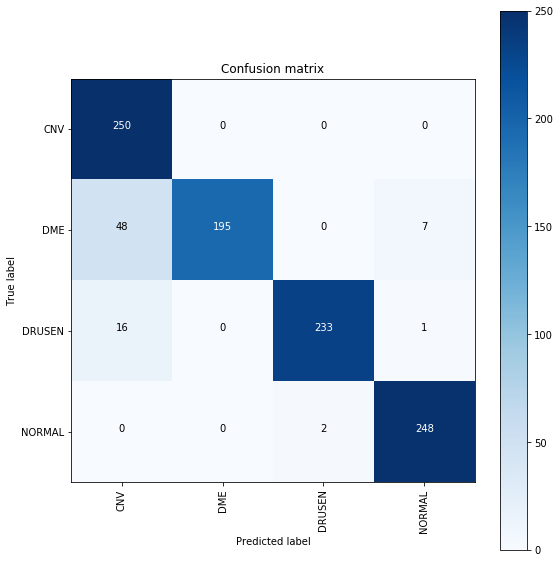

In [11]:
# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.80      1.00      0.89       250
         DME       1.00      0.78      0.88       250
      DRUSEN       0.99      0.93      0.96       250
      Normal       0.97      0.99      0.98       250

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.93      0.93      1000



### Observations:
1. We have 3 hidden layers in this CNN model.
2. **Test Loss: 0.689**
3. **Test accuracy: 0.854**
4. **precision = 0.94 || recall = 0.93 || f1-score = 0.93**
3. Dataset imbalance causes low Train & Test accuracy:

## CNN Model with 3 Hidden Layers & Class_weights balancing.

In [2]:
# Model parameters
image_size = 256
batch_size = 32
num_classes = 4
epochs = 10

In [3]:
# Baseline Model.
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 256)     7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 256)     1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 256)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 128)     295040    
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 128)     512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 128)       0         
__________

In [5]:
train_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory('OCT2017/train',target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory('OCT2017/train',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data


test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory("OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [6]:
# https://stackoverflow.com/questions/41815354/keras-flow-from-directory-over-or-undersample-a-class/48050531
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train_generator.classes),
                                                  train_generator.classes)

In [7]:
filepath="weights_balanced_cnn_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [8]:
# Train the network
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              epochs = epochs, 
                              callbacks=callbacks_list,
                              class_weight=class_weights)

Epoch 1/10
2087/2087 [==============================] - 662s 317ms/step - loss: 0.7140 - acc: 0.7462 - val_loss: 0.5367 - val_acc: 0.8152

Epoch 00001: val_acc improved from -inf to 0.81520, saving model to weights_balanced_cnn_best.hdf5
Epoch 2/10
2087/2087 [==============================] - 656s 314ms/step - loss: 0.4119 - acc: 0.8531 - val_loss: 0.5835 - val_acc: 0.7969

Epoch 00002: val_acc did not improve from 0.81520
Epoch 3/10
2087/2087 [==============================] - 655s 314ms/step - loss: 0.2796 - acc: 0.9035 - val_loss: 0.3391 - val_acc: 0.8806

Epoch 00003: val_acc improved from 0.81520 to 0.88058, saving model to weights_balanced_cnn_best.hdf5
Epoch 4/10
2087/2087 [==============================] - 654s 314ms/step - loss: 0.2185 - acc: 0.9247 - val_loss: 0.3995 - val_acc: 0.8789

Epoch 00004: val_acc did not improve from 0.88058
Epoch 5/10
2087/2087 [==============================] - 656s 314ms/step - loss: 0.1701 - acc: 0.9413 - val_loss: 0.4862 - val_acc: 0.8718

Epoc

In [9]:
# serialize model to JSON
model_json = model.to_json()
with open("model_balanced_cnn.json", "w") as json_file:
    json_file.write(model_json)




Test Loss: 0.23170399683858117
Test accuracy: 0.9405241935483871


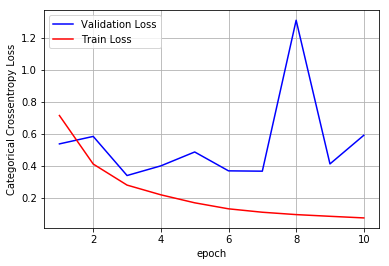

In [10]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // batch_size) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# This function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [28]:
from keras.models import load_model
model = load_model('weights_balanced_cnn_best.hdf5')

In [29]:
pred_datagen = ImageDataGenerator()

pred_generator = pred_datagen.flow_from_directory("OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)                                                  

Found 1000 images belonging to 4 classes.


In [30]:
pred_generator.reset()
y_pred = model.predict_generator(pred_generator,steps = 1000)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

In [31]:
Y_pred = np.argmax(y_pred,axis = 1) 

In [32]:
import pickle
with open('y_pred_balanced_cnn_best.pkl','wb') as f:
    pickle.dump(y_pred, f)

--------------------
| Confusion Matrix |
--------------------

 [[247   3   0   0]
 [ 13 223   0  14]
 [  2   0 247   1]
 [  0   0   0 250]]


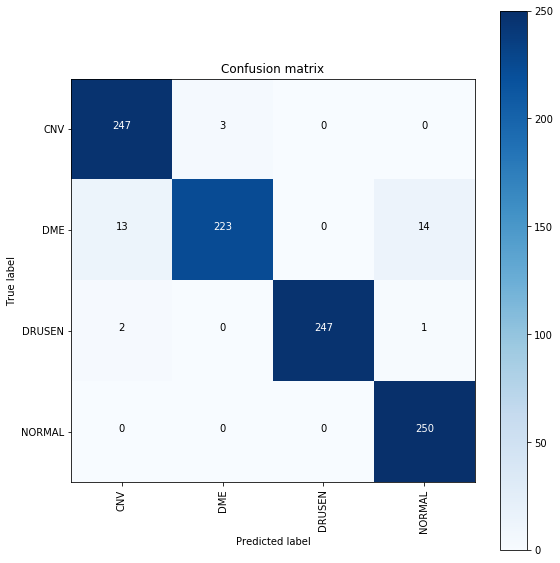

In [33]:
# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.94      0.99      0.96       250
         DME       0.99      0.89      0.94       250
      DRUSEN       1.00      0.99      0.99       250
      Normal       0.94      1.00      0.97       250

   micro avg       0.97      0.97      0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



### Observations:
1. We have 3 hidden layers in this CNN model.
2. **Test Loss: 0.231**
3. **Test accuracy: 0.94**
4. **precision = 0.97 || recall = 0.97 || f1-score = 0.97**
3. **Class weights balancing has dtastically improved Test Loss & Test accuracy**

## CNN Model with 5 Hidden Layers.

In [15]:
# Model parameters
image_size = 256
batch_size = 32
num_classes = 4
epochs = 10

In [16]:
# Baseline Model.
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 256)     7168      
_________________________________________________________________
batch_normalization_13 (Batc (None, 254, 254, 256)     1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 256)     0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 127, 127, 256)     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 256)     590080    
_________________________________________________________________
batch_normalization_14 (Batc (None, 125, 125, 256)     1024      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 256)       0         
__________

In [17]:
train_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory('OCT2017/train',target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory('OCT2017/train',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data


test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory("OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [18]:
# https://stackoverflow.com/questions/41815354/keras-flow-from-directory-over-or-undersample-a-class/48050531
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train_generator.classes),
                                                  train_generator.classes)

In [19]:
filepath="weights_balanced_cnn_5layered_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [20]:
# Train the network
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              epochs = epochs, 
                              callbacks=callbacks_list,
                              class_weight=class_weights)

Epoch 1/10
2087/2087 [==============================] - 792s 379ms/step - loss: 0.6870 - acc: 0.7516 - val_loss: 0.7913 - val_acc: 0.6535

Epoch 00001: val_acc improved from -inf to 0.65349, saving model to weights_balanced_cnn_5layered_best.hdf5
Epoch 2/10
2087/2087 [==============================] - 792s 380ms/step - loss: 0.3850 - acc: 0.8665 - val_loss: 0.3890 - val_acc: 0.8713

Epoch 00002: val_acc improved from 0.65349 to 0.87128, saving model to weights_balanced_cnn_5layered_best.hdf5
Epoch 3/10
2087/2087 [==============================] - 788s 378ms/step - loss: 0.3001 - acc: 0.9015 - val_loss: 0.6034 - val_acc: 0.8359

Epoch 00003: val_acc did not improve from 0.87128
Epoch 4/10
2087/2087 [==============================] - 788s 378ms/step - loss: 0.2667 - acc: 0.9131 - val_loss: 0.2265 - val_acc: 0.9247

Epoch 00004: val_acc improved from 0.87128 to 0.92469, saving model to weights_balanced_cnn_5layered_best.hdf5
Epoch 5/10
2087/2087 [==============================] - 789s 378

In [21]:
# serialize model to JSON
model_json = model.to_json()
with open("model_balanced_cnn5layered.json", "w") as json_file:
    json_file.write(model_json)




Test Loss: 0.04069264918085067
Test accuracy: 0.9899193548387096


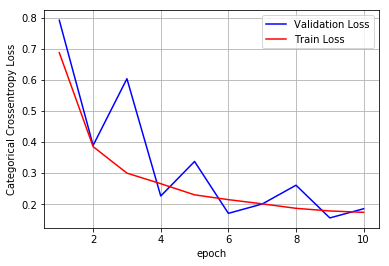

In [22]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // batch_size) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# This function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [35]:
from keras.models import load_model
model = load_model('weights_balanced_cnn_5layered_best.hdf5')

In [36]:
pred_datagen = ImageDataGenerator()

pred_generator = pred_datagen.flow_from_directory("OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)                                                  

Found 1000 images belonging to 4 classes.


In [37]:
pred_generator.reset()
y_pred = model.predict_generator(pred_generator,steps = 1000)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

In [38]:
import pickle
with open('y_pred_balanced_cnn_5layered_best.pkl','wb') as f:
    pickle.dump(y_pred, f)

--------------------
| Confusion Matrix |
--------------------

 [[250   0   0   0]
 [  9 240   0   1]
 [  7   0 243   0]
 [  0   0   0 250]]


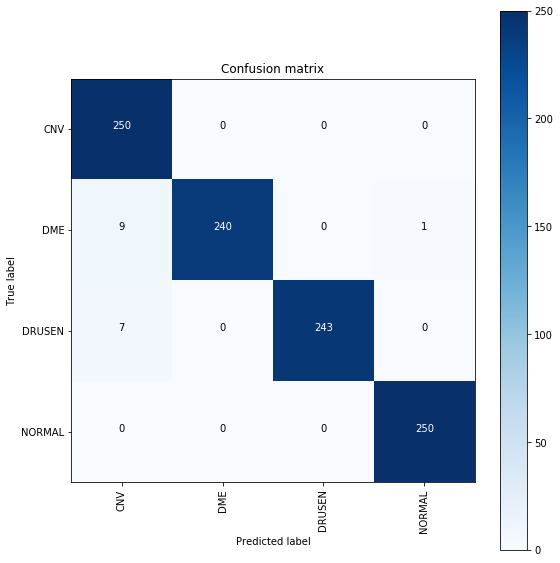

In [39]:
# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.94      1.00      0.97       250
         DME       1.00      0.96      0.98       250
      DRUSEN       1.00      0.97      0.99       250
      Normal       1.00      1.00      1.00       250

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



### Observations:
1. We have 5 hidden layers in this CNN model.
2. **Test Loss: 0.040**
3. **Test accuracy: 0.989**
4. **precision = 0.98 || recall = 0.98 || f1-score = 0.98**
3. **CNN model with 5 hidden layers perform brilliantly.**

## CNN Model with 7 Hidden Layers.

In [2]:
# Model parameters
image_size = 256
batch_size = 32
num_classes = 4
epochs = 10

In [3]:
# Baseline Model.
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 256)     7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 256)     1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 256)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 256)     590080    
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 256)     1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 256)       0         
__________

In [4]:
train_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory('OCT2017/train',target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory('OCT2017/train',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') # set as validation data


test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory("OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [5]:
# https://stackoverflow.com/questions/41815354/keras-flow-from-directory-over-or-undersample-a-class/48050531
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train_generator.classes),
                                                  train_generator.classes)

In [6]:
filepath="weights_balanced_cnn_7layered_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [7]:
# Train the network
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              epochs = epochs, 
                              callbacks=callbacks_list,
                              class_weight=class_weights)

Epoch 1/10
2087/2087 [==============================] - 804s 385ms/step - loss: 0.9618 - acc: 0.6413 - val_loss: 0.6447 - val_acc: 0.7742

Epoch 00001: val_acc improved from -inf to 0.77417, saving model to weights_balanced_cnn_7layered_best.hdf5
Epoch 2/10
2087/2087 [==============================] - 796s 382ms/step - loss: 0.6232 - acc: 0.7831 - val_loss: 0.9382 - val_acc: 0.7429

Epoch 00002: val_acc did not improve from 0.77417
Epoch 3/10
2087/2087 [==============================] - 798s 382ms/step - loss: 0.4749 - acc: 0.8392 - val_loss: 0.3435 - val_acc: 0.8875

Epoch 00003: val_acc improved from 0.77417 to 0.88754, saving model to weights_balanced_cnn_7layered_best.hdf5
Epoch 4/10
2087/2087 [==============================] - 796s 381ms/step - loss: 0.3983 - acc: 0.8727 - val_loss: 0.3150 - val_acc: 0.9013

Epoch 00004: val_acc improved from 0.88754 to 0.90134, saving model to weights_balanced_cnn_7layered_best.hdf5
Epoch 5/10
2087/2087 [==============================] - 796s 381

In [8]:
# serialize model to JSON
model_json = model.to_json()
with open("model_balanced_cnn_7layered.json", "w") as json_file:
    json_file.write(model_json)




Test Loss: 0.08890247164714721
Test accuracy: 0.9707661290322581


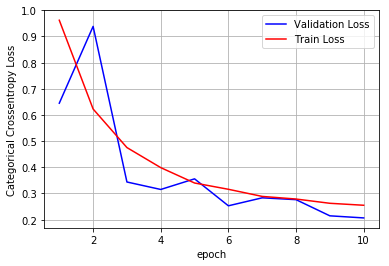

In [9]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // batch_size) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# This function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [44]:
from keras.models import load_model
model = load_model('weights_balanced_cnn_7layered_best.hdf5')

In [45]:
pred_datagen = ImageDataGenerator()

pred_generator = pred_datagen.flow_from_directory("OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)                                                  

Found 1000 images belonging to 4 classes.


In [46]:
pred_generator.reset()
y_pred = model.predict_generator(pred_generator,steps = 1000)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

In [47]:
import pickle
with open('y_pred_balanced_cnn_7layered_best.pkl','wb') as f:
    pickle.dump(y_pred, f)

--------------------
| Confusion Matrix |
--------------------

 [[249   1   0   0]
 [  4 244   0   2]
 [ 21   1 228   0]
 [  0   0   0 250]]


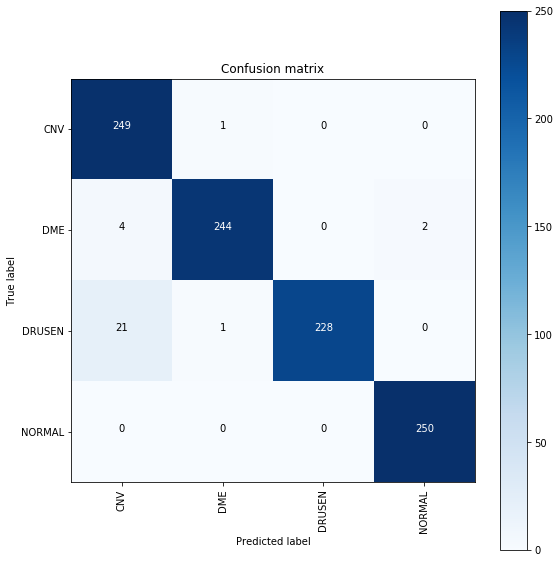

In [48]:
# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.91      1.00      0.95       250
         DME       0.99      0.98      0.98       250
      DRUSEN       1.00      0.91      0.95       250
      Normal       0.99      1.00      1.00       250

   micro avg       0.97      0.97      0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



### Observations:
1. We have 7 hidden layers in this CNN model.
2. **Test Loss: 0.088**
3. **Test accuracy: 0.971**
4. **precision = 0.97 || recall = 0.97 || f1-score = 0.97**
3. **CNN model with 5 hidden layers perform brilliantly.**

# Models Performance Table 

## ![title](oct.jpg) 

# Conclusion:
1. **We have Deep learning CNN for classification model.**
2. **Due to large size of dataset we have used ImageDataGenerator module from keras for Batch wise training of our CNN model.**
3. **CNN model with 5 Hdden Layers gives best results:**
    1. **Test Loss: 0.040**
    2. **Test accuracy: 0.989**